### Zadanie 1 

In [23]:
import math
import scipy.integrate as scint
import numpy as np
from scipy import integrate
from scipy.integrate import quad
from scipy import integrate
from scipy.special import erf
from scipy.integrate import simps



x = np.linspace(0,1,100)

def f(x):
    return math.e**(-2*x)

#metoda analityczna
def analityczna(f):
    return -1/2*math.e**(-2)+1/2


meta= analityczna(f)
print("Metoda analityczna: ",meta)

#metoda prostokątów
def prostokatow(a,b,f):
    return(b-a)*f((a+b)/2)

metp = prostokatow(0,1,f)
print("Metoda prostokątów: ",metp)


#metoda trapezów
def trapezow(a,b,f):
    return 1/2*(b-a)*(f(a)+f(b))

mett = trapezow(0,1,f)
print("Metoda trapezów: ",mett)


#metoda Simpsona
def simpson(a,b,n,f):
    h=(b-a)/n 
    wynik=0
    y = 0
    for i in range(0,n):
        x = a +(i+1)*h
        y += f(x-h/2)
        if(i<n):
            wynik += f(x)
    wynik = h/6*(f(a)+4*y+2*wynik+f(b))
    return wynik
mets = simpson(0,1,1,f)
print("Metoda Simpsona: ",mets)


#złożony wzór trapezów(10 podprzedziałów)
def zloz_trapez(a,b,n,f):
    h=(b-a)/n
    wynik = 0
    for i in range(0,n):
        wynik += 1/2*h*(f(a+(i)*h)+f(a+(i+1)*h))    
    return wynik
metzt=zloz_trapez(0,1,10,f)
print("Metoda zl trap: ",metzt)


#metoda złożona Simpsona(zmieniona ilość przedziałów na 10)
def zl_Simpson(a,b,n,f):
    h=(b-a)/n 
    wynik=0
    y = 0
    for i in range(0,n):
        x = a +(i+1)*h
        y += f(x-h/2)
        if(i<n):
            wynik += f(x)
    wynik = h/6*(f(a)+4*y+2*wynik+f(b))
    return wynik
metzs = zl_Simpson(0,1,10,f)
print("Metoda zl Simpsona: ",metzs)

#Metoda Romberga
wynik = integrate.romberg(f, 0, 1, show=False)
print("Metoda Romberga: ",wynik)


#Metoda quad
print("Metoda quad: ", quad(f,0,1)[0])

print("")
print("Różnice: \n")
print("Prostokątów:",abs(metp - meta ))
print("Trapezów:",abs(mett - meta ))
print("Simpsona:",abs(mets - meta ))
print("Złożona trapezów:",abs(metzt - meta ))
print("Złożona Simpsona:",abs(metzs - meta ))
print("Romberg: ",abs(wynik - meta ))
print("Quad:",abs(quad(f,0,1)[0] - meta ))




Metoda analityczna:  0.43233235838169365
Metoda prostokątów:  0.36787944117144233
Metoda trapezów:  0.5676676416183064
Metoda Simpsona:  0.47958726906593463
Metoda zl trap:  0.4337725064184668
Metoda zl Simpsona:  0.4368437743885901
Metoda Romberga:  0.43233235838169437
Metoda quad:  0.4323323583816936

Różnice: 

Prostokątów: 0.06445291721025131
Trapezów: 0.13533528323661276
Simpsona: 0.04725491068424098
Złożona trapezów: 0.00144014803677317
Złożona Simpsona: 0.004511416006896474
Romberg:  7.216449660063518e-16
Quad: 5.551115123125783e-17


Metoda quad uzyskała najbardziej bliżony wynik do metody analitycznej. Metoda Romberga również daje bardzo zliżony wynik.

### Zadanie 2

In [50]:
from scipy.stats import norm

def f(t):
    return math.e**((-t**2)/2)/math.sqrt(2*math.pi)

#metoda złożona trapezów
def zloz_trapez(a,b,n,f):
    h=(b-a)/n
    wynik = 0
    for i in range(0,n):
        wynik += 1/2*h*(f(a+(i)*h)+f(a+(i+1)*h))    
    return wynik

#metoda złożona simpsona
def zl_Simpson(a,b,n,f):
    h=(b-a)/n 
    wynik=0
    y = 0
    for i in range(0,n):
        x = a +(i+1)*h
        y += f(x-h/2)
        if(i<n):
            wynik += f(x)
    wynik = h/6*(f(a)+4*y+2*wynik+f(b))
    return wynik

def trapez(t):
    return zloz_trapez(0,t,10,f)-0.45

def simpson(t):
    return zl_Simpson(0,t, 10,f)-0.45

#wzór Newtona 
def newton(f, df, x0, t, max):
    x = x0 - f(x0)/df(x0)
    y = x0
    suma=0
    while abs(x-y)>t and suma<max:
        suma=suma+1
        y = x
        x = y - f(y)/df(y)
    return x

mett=newton(trapez, f, 0.5, 1e-5, 10)
mets=newton(simpson, f, 0.5, 1e-5, 10)


print("Wartosć referencyjna: \n", norm.ppf(0.95))
print ("Metoda złożona trapezów: ", mett , "\nróżnica: ", abs(mett-norm.ppf(0.95)) )
print("Metoda złożona Simpsona: ", mets, "\nróżnica: ", abs(mets-norm.ppf(0.95)))


Wartosć referencyjna: 
 1.6448536269514722
Metoda złożona trapezów:  1.648576416802482 
różnica:  0.0037227898510097113
Metoda złożona Simpsona:  1.5894771860215031 
różnica:  0.05537644092996907


### Zadanie 3 

In [75]:
import scipy.interpolate
import numpy as np
#interpolacja f. składanymi 3. stopnia
t=[0.0,0.5,1.0,2.0,3.0,4.0]
a=[-4.5,-4.5,-2.3,-1.0,-0.5,0.0]
va=[]
vb=[]

v = scipy.interpolate.InterpolatedUnivariateSpline(t,a,k=3)
for i in t:
    va.append(quad(v,0,i)[0])

C = va[len(va)-1]
for i in va:
    vb.append(i-C)

v = scipy.interpolate.InterpolatedUnivariateSpline(t,vb,k=3)
s = quad(v,0,4)[0]
print("Droga hamowania: ",s)

t = 0.5
s1 = quad(v,0,0.5)[0]
print("Średnia prędkość: ",s1/t)



Droga hamowania:  6.331502525049489
Średnia prędkość:  5.2192392676779775


### Zadanie 4

Metoda trapezów:  11.084984534623398
Metoda Simpsona:  11.612489864139484
Metoda Romberga:  15.825159885482952


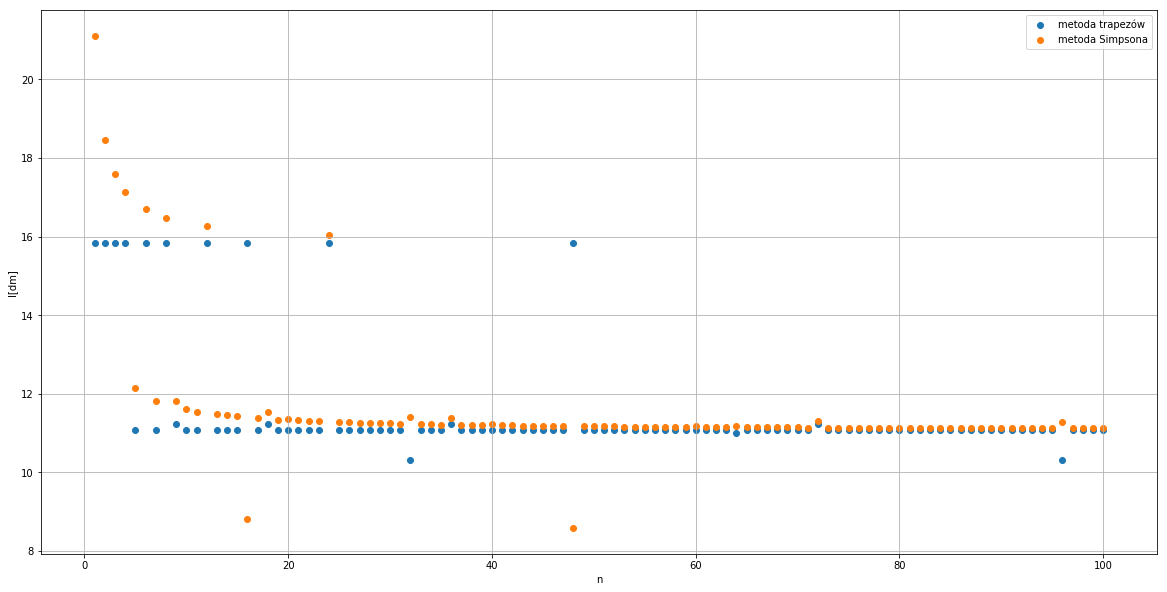

In [77]:
import matplotlib.pyplot as plt
import scipy
import math
import numpy as np
import scipy.integrate

A = 0.1
T = 0.2
def f(x):
    return A*math.sin(2*math.pi*x/T)
    
def fprim(x):
    return 2*math.pi*A/T*math.cos(2*math.pi*x/T)
        
def dl_luku(x):
    return math.sqrt(1+fprim(x)**2)

def zloz_trapez(a,b,n,f):
    h=(b-a)/n
    wynik = 0
    for i in range(0,n):
        wynik += 1/2*h*(f(a+(i)*h)+f(a+(i+1)*h))    
    return wynik

def zl_Simpson(a,b,n,f):
    h=(b-a)/n 
    wynik=0
    y = 0
    for i in range(0,n):
        x = a +(i+1)*h
        y += f(x-h/2)
        if(i<n):
            wynik += f(x)
    wynik = h/6*(f(a)+4*y+2*wynik+f(b))
    return wynik

print("Metoda trapezów: ",zloz_trapez(0,4.8,10,dl_luku))
print("Metoda Simpsona: ",zl_Simpson(0,4.8,10,dl_luku))
print("Metoda Romberga: ",scipy.integrate.romberg(dl_luku,0,4.8))
    

trapez=[]
simpson=[]
a=[]
for i in range(1,101):
    a.append(i)
    trapez.append(zloz_trapez(0,4.8,i,dl_luku))
    simpson.append(zl_Simpson(0,4.8,i,dl_luku))

plt.figure(figsize=(20,10))
plt.scatter(a,trap, label="metoda trapezów")
plt.scatter(a,simp, label="metoda Simpsona")
plt.xlabel('n')
plt.ylabel('l[dm]')
plt.legend()
plt.grid()
plt.show()


Im większa liczba przedziałów, tym dokładniejsze są metody.